# Making Business Decisions Project

The goal of this project is to help in making business decisions that may boost revenue as an analyst of a big online store, through prioritizing hypotheses , launching an A/B test, and analyzing the results.

The analysis process outline:
- Prioritizing hypothsis using ICE and RICE.
- General information on data.
- Data preparation - data types conversion, control/test groups division.
- Data analysis and hypotheses testing- Calculation and investigation of KPI's , presentation of findings in charts, drawing conclusions from the results, and hypotheses testing using the relevant tests.
- Overall conclusions and recommedations.

Task decomposition:<br>
- Splitting the original datasets to Control and Test groups.
- Extracting from orders data the users that present in both groups.
- Grouping the orders data according to the required KPI calculation and graphs.
- Merging each group orders data with the corresponding visits data where needed.
- Testing hypotheses regarding differences between groups using the relevant statistical test, based on raw data.
- Determining limits for outliers, filtering the data, and testing the hypotheses based on filtered data.

## Prioritizing Hypotheses

In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats as st
import math
import seaborn as sns
pd.options.display.max_colwidth=210

In [16]:
path = '/Data Analysis/Projects/'
hypotheses = pd.read_csv(path+'hypotheses_us.csv', sep=';')

In [17]:
hypotheses

,Hypothesis,Reach,Impact,Confidence,Effort
0,Add two new channels for attracting traffic. This will bring 30% more users,3,10,8,6
1,Launch your own delivery service. This will shorten delivery time,2,5,4,10
2,Add product recommendation blocks to the store's site. This will increase conversion and average purchase size,8,3,7,3
3,Change the category structure. This will increase conversion since users will find the products they want more quickly,8,3,3,8
4,Change the background color on the main page. This will increase user engagement,3,1,1,1
5,Add a customer review page. This will increase the number of orders,3,2,2,3
6,Show banners with current offers and sales on the main page. This will boost conversion,5,3,8,3
7,Add a subscription form to all the main pages. This will help you compile a mailing list,10,7,8,5
8,Launch a promotion that gives users discounts on their birthdays,1,9,9,5


In [18]:
hypotheses.columns = hypotheses.columns.str.lower()

In [19]:
hypotheses.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9 entries, 0 to 8
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   hypothesis  9 non-null      object
 1   reach       9 non-null      int64 
 2   impact      9 non-null      int64 
 3   confidence  9 non-null      int64 
 4   effort      9 non-null      int64 
dtypes: int64(4), object(1)
memory usage: 488.0+ bytes


**Prioritizng hypotheses - ICE and RICE**

ICE / RICE framework is a method for prioritizing hypotheses - experiments and ideas to maximize growth of key business metrics - by rating several factors on 1-10 scale. <br>
The abbreviation includes 4 factors used to evaluate and prioritize product features:<br>
Reach — how many users will be affected by the update<br>
Impact — how strongly this update will affect the users<br>
Confidence — how sure you are that your product will affect them in this way<br>
Effort — how much will it cost to test the hypothesis<br>
Calculation of the scores:<br>
ICE score = Impact * Confidence / Effort<br>
RICE score = Reach * impact * Confidence / Effort

Applying ICE framework to prioritize hypotheses, adding the score as a new column and sort by the score in a descending order of priority:

In [20]:
hypotheses['ICE'] = (
    hypotheses['impact'] * hypotheses['confidence'] / hypotheses['effort']).astype(int)
hypotheses = hypotheses.sort_values(by='ICE', ascending=False)

In [21]:
hypotheses

,hypothesis,reach,impact,confidence,effort,ICE
8,Launch a promotion that gives users discounts on their birthdays,1,9,9,5,16
0,Add two new channels for attracting traffic. This will bring 30% more users,3,10,8,6,13
7,Add a subscription form to all the main pages. This will help you compile a mailing list,10,7,8,5,11
6,Show banners with current offers and sales on the main page. This will boost conversion,5,3,8,3,8
2,Add product recommendation blocks to the store's site. This will increase conversion and average purchase size,8,3,7,3,7
1,Launch your own delivery service. This will shorten delivery time,2,5,4,10,2
3,Change the category structure. This will increase conversion since users will find the products they want more quickly,8,3,3,8,1
4,Change the background color on the main page. This will increase user engagement,3,1,1,1,1
5,Add a customer review page. This will increase the number of orders,3,2,2,3,1


Applying RICE framework to prioritize hypotheses, adding the score as a new column and sort by the score in a descending order of priority:

In [22]:
hypotheses['RICE'] = hypotheses['reach'] * hypotheses['impact'] * hypotheses['confidence'] 
/ hypotheses['effort']
hypotheses = hypotheses.sort_values(by='RICE', ascending=False)

In [23]:
hypotheses

,hypothesis,reach,impact,confidence,effort,ICE,RICE
7,Add a subscription form to all the main pages. This will help you compile a mailing list,10,7,8,5,11,560
0,Add two new channels for attracting traffic. This will bring 30% more users,3,10,8,6,13,240
2,Add product recommendation blocks to the store's site. This will increase conversion and average purchase size,8,3,7,3,7,168
6,Show banners with current offers and sales on the main page. This will boost conversion,5,3,8,3,8,120
8,Launch a promotion that gives users discounts on their birthdays,1,9,9,5,16,81
3,Change the category structure. This will increase conversion since users will find the products they want more quickly,8,3,3,8,1,72
1,Launch your own delivery service. This will shorten delivery time,2,5,4,10,2,40
5,Add a customer review page. This will increase the number of orders,3,2,2,3,1,12
4,Change the background color on the main page. This will increase user engagement,3,1,1,1,1,3


Comparison between the above tables shows the changes in prioritizng hypotheses between ICE and RICE frameworks. Although the upper 5 and lower 4 items contain the same hypotheses in both tables, the order of items inside those parts changes. <br>
The high ICE scores, in general, consists of high rates of impact and confidence and low rate of effort, but do not include the reach component. That is, actions that are expected to have a significant affect on users, with a strong likelihood to achieve this goal and low-moderate cost of testing, while not taking into account how many users will be affected.<br>
For that reason the 'discount on birthdays' hypothesis is located first in ICE, but only 5th in RICE because of 1 value in reach component.<br>
On the other hand, RICE consists of the ICE components with the addition of reach, so the highest scores must contain a high reach score as well. No wonder that 'subscription form to all the main pages' is on the lead, with a reach component of 10.

The next pair plot presents the relationship between the metrics across hypotheses, and the metrics distributions:

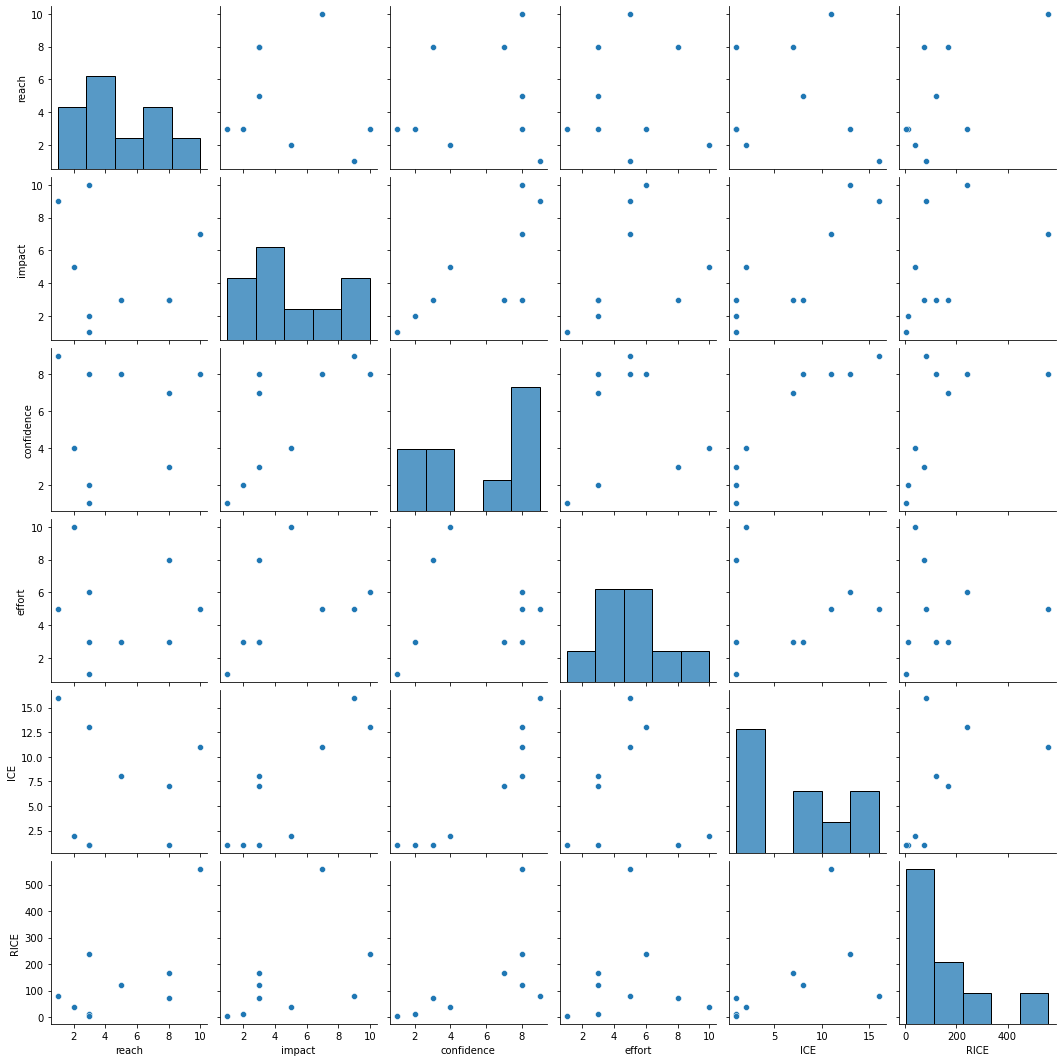

In [24]:
sns.pairplot(hypotheses)
plt.show()

Correlations between metrics:

In [25]:
hypotheses.corr()

,reach,impact,confidence,effort,ICE,RICE
reach,1.000000,-0.179324,0.144596,-0.031417,-0.052702,0.652203
impact,-0.179324,1.000000,0.734052,0.401831,0.850940,0.488421
confidence,0.144596,0.734052,1.000000,0.066679,0.922828,0.583905
effort,-0.031417,0.401831,0.066679,1.000000,-0.025772,0.048321
ICE,-0.052702,0.850940,0.922828,-0.025772,1.000000,0.529769
RICE,0.652203,0.488421,0.583905,0.048321,0.529769,1.000000


The histograms show the distribution of a each metric while the scatter plots show the relationship between two metrics. <br>
The scatter plots and the correlations table shows that ICE score is mostly affected by Impact and Confidence, while RICE mostly by Reach.<br>
Regarding the four components of the score, a strong positive relationships was found between Impact and Confidence.<br>
As for the scores distributions, both ICE and RICE are right-skewed distributed. The practical meaning for us is a small amount of hypotheses with much higher scores than the rest, a fact that we should certainly take into account when prioritizing.

## A/B Test Analysis

In [26]:
orders = pd.read_csv(path+'orders_us.csv')
visits = pd.read_csv(path+'visits_us.csv')

In [27]:
orders.head()

,transactionId,visitorId,date,revenue,group
0,3667963787,3312258926,2019-08-15,30.4,B
1,2804400009,3642806036,2019-08-15,15.2,B
2,2961555356,4069496402,2019-08-15,10.2,A
3,3797467345,1196621759,2019-08-15,155.1,B
4,2282983706,2322279887,2019-08-15,40.5,B


In [28]:
orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   transactionId  1197 non-null   int64  
 1   visitorId      1197 non-null   int64  
 2   date           1197 non-null   object 
 3   revenue        1197 non-null   float64
 4   group          1197 non-null   object 
dtypes: float64(1), int64(2), object(2)
memory usage: 46.9+ KB


In [29]:
visits.head()

,date,group,visits
0,2019-08-01,A,719
1,2019-08-02,A,619
2,2019-08-03,A,507
3,2019-08-04,A,717
4,2019-08-05,A,756


In [30]:
visits.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   date    62 non-null     object
 1   group   62 non-null     object
 2   visits  62 non-null     int64 
dtypes: int64(1), object(2)
memory usage: 1.6+ KB


### Data Preprocessing

The visits datasets is already aggregated by date and number of visits, so the only preparation for this dataset in changing the date column data type. <br>
we'll start with data types for both datasets, changing date data to datetime:

In [31]:
visits['date'] = pd.to_datetime(visits['date'], format='%Y-%m-%d')
visits.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   date    62 non-null     datetime64[ns]
 1   group   62 non-null     object        
 2   visits  62 non-null     int64         
dtypes: datetime64[ns](1), int64(1), object(1)
memory usage: 1.6+ KB


In [32]:
orders['date'] = pd.to_datetime(orders['date'], format='%Y-%m-%d')
orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   transactionId  1197 non-null   int64         
 1   visitorId      1197 non-null   int64         
 2   date           1197 non-null   datetime64[ns]
 3   revenue        1197 non-null   float64       
 4   group          1197 non-null   object        
dtypes: datetime64[ns](1), float64(1), int64(2), object(1)
memory usage: 46.9+ KB


Looking for duplicates:

In [33]:
orders.duplicated().sum()

0

Checking if there are users that were allocated to both groups. <br>
For this purpose we'll devide the users to two datasets by groups ('A' = control, 'B' = test), inner merge the tables on 'visitorId' and find the duplications:

In [34]:
control = orders[orders['group']=='A']
test = orders[orders['group']=='B']

In [35]:
both_groups = pd.merge(left=control, right=test, how='inner', on='visitorId')
len(both_groups)
both_groups.head()

,transactionId_x,visitorId,date_x,revenue_x,group_x,transactionId_y,date_y,revenue_y,group_y
0,2961555356,4069496402,2019-08-15,10.2,A,1473132782,2019-08-12,10.8,B
1,2223239646,199603092,2019-08-15,55.7,A,437656952,2019-08-02,55.7,B
2,62794304,199603092,2019-08-22,110.3,A,437656952,2019-08-02,55.7,B
3,2971973105,199603092,2019-08-27,45.9,A,437656952,2019-08-02,55.7,B
4,1941707234,199603092,2019-08-12,100.0,A,437656952,2019-08-02,55.7,B


Creating a new dataset that doesn't include the users that were allocated to both groups:

In [36]:
orders_new = orders[~orders['visitorId'].isin(both_groups['visitorId'])]
orders_new.head(10)

,transactionId,visitorId,date,revenue,group
0,3667963787,3312258926,2019-08-15,30.4,B
1,2804400009,3642806036,2019-08-15,15.2,B
3,3797467345,1196621759,2019-08-15,155.1,B
4,2282983706,2322279887,2019-08-15,40.5,B
5,182168103,935554773,2019-08-15,35.0,B
6,398296753,2900797465,2019-08-15,30.6,B
7,2626614568,78758296,2019-08-15,20.1,A
8,1576988021,295230930,2019-08-15,215.9,A
9,1506739906,1882260405,2019-08-15,30.5,B
10,3649131742,879864040,2019-08-15,65.7,A


In [37]:
len(orders_new)

1016

**Data preparation summary:**<br>
Preprocessing of data included covnerting data types where needed (date columns), looking for duplicates in the original orders table, deviding the data to control (A) and test (B) group, and dropping data of users that presented in both groups. No missing values in the datasets.

### Data Analysis

**1. Cumulative revenue by group**

In order to calculate metrics, we'll devide the new dataset to control and test groups:

In [38]:
control_new = orders_new[orders_new['group'] == 'A']
test_new = orders_new[orders_new['group'] == 'B']
print('Control group users:', len(control_new), '\nTest group users:', len(test_new))

Control group users: 468 
Test group users: 548


Grouping the groups data by date and adding cumulative revenue:

In [39]:
control_by_date = control_new.groupby('date')['revenue'].sum().reset_index()
control_by_date.columns = ['date','revenue']
control_by_date['cum_rev'] = control_by_date['revenue'].cumsum()
control_by_date.head()

,date,revenue,cum_rev
0,2019-08-01,2266.6,2266.6
1,2019-08-02,1468.3,3734.9
2,2019-08-03,1815.2,5550.1
3,2019-08-04,675.5,6225.6
4,2019-08-05,1398.0,7623.6


In [40]:
test_by_date = test_new.groupby('date')['revenue'].sum().reset_index()
test_by_date.columns = ['date','revenue']
test_by_date['cum_rev'] = test_by_date['revenue'].cumsum()
test_by_date.head()

,date,revenue,cum_rev
0,2019-08-01,967.2,967.2
1,2019-08-02,2568.1,3535.3
2,2019-08-03,1071.6,4606.9
3,2019-08-04,1531.6,6138.5
4,2019-08-05,1449.3,7587.8


Plotting a graph of cumulative revenue by group:

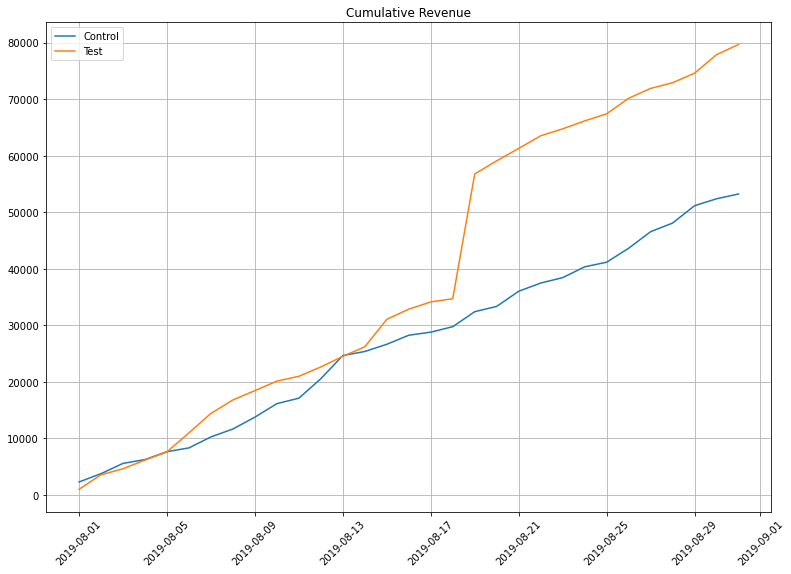

In [41]:
plt.figure(figsize=(13,9))
plt.plot(control_by_date['date'], control_by_date['cum_rev'], label='Control')
plt.plot(test_by_date['date'], test_by_date['cum_rev'], label='Test')
plt.title('Cumulative Revenue')
plt.xticks(rotation=45)
plt.grid()
plt.legend()
plt.show()

The above plot shows that both groups' cumulative revenue increase over time. In the first half of the test period there is almost no difference between groups, with a slight advantage to test group. Then the test group cumulative revenue suddenly increase to a significant difference in cumulative revenue from the rates of control group, keeping this gap during the rest of the period.<br>
Overall it seems that the cumulative revenue is better for the test group.

To better graphically notice of which group is doing better in cumulative revenue, we'll plot also a relative difference graph:

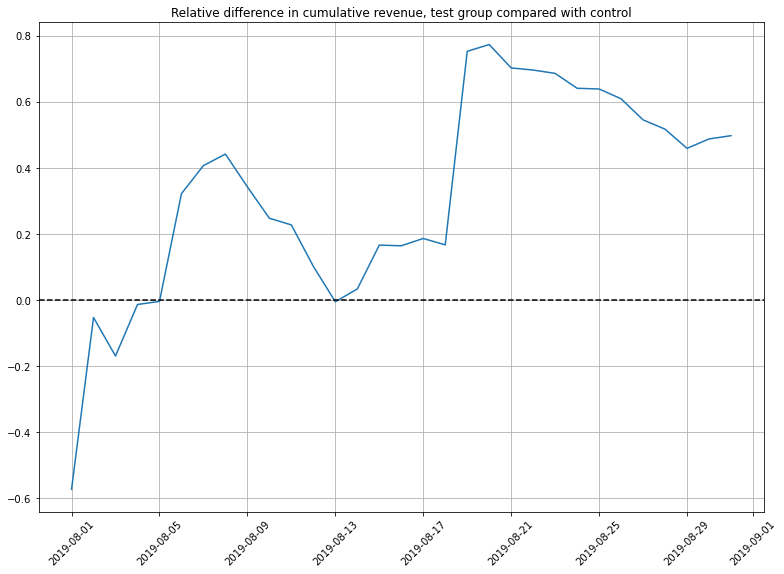

In [42]:
plt.figure(figsize=(13,9))
plt.plot(control_by_date['date'], 
         (test_by_date['cum_rev']) / (control_by_date['cum_rev']) -1)
plt.axhline(y=0, color='black', linestyle='--')
plt.title('Relative difference in cumulative revenue, test group compared with control')
plt.xticks(rotation=45)
plt.grid()
plt.show()

In the cumulative revenue relative difference plot we can see that the test group has been lagging behind for the first few days, then take the lead for about a week till the touching point at the 13th, then rising sharply and finally decreasing slowly in a more stable manner during the last few days. We can conclude from this graph that in cumulative revenue, the test group surpassed the control group.

**2. Cumulative average order size by group**<br>
To calculate the cumulative average order size by group, we need to devide cumulative revenue by cumulative number of orders.<br>
First we'll calculate total number of orders for each day, and then present cumulative orders in a new column:

In [43]:
control_new.head()

,transactionId,visitorId,date,revenue,group
7,2626614568,78758296,2019-08-15,20.1,A
8,1576988021,295230930,2019-08-15,215.9,A
10,3649131742,879864040,2019-08-15,65.7,A
12,2809384911,3213223594,2019-08-15,115.4,A
14,3859315276,1565034404,2019-08-15,170.9,A


In [44]:
control_avg_order = control_new.groupby('date').agg(
    {'revenue':'sum','transactionId':'nunique'}).reset_index()
control_avg_order.columns = ['date','revenue','orders']
control_avg_order.head()

,date,revenue,orders
0,2019-08-01,2266.6,23
1,2019-08-02,1468.3,19
2,2019-08-03,1815.2,24
3,2019-08-04,675.5,11
4,2019-08-05,1398.0,22


In [45]:
control_avg_order['cum_rev'] = control_avg_order['revenue'].cumsum()
control_avg_order['cum_orders'] = control_avg_order['orders'].cumsum()
control_avg_order['cum_avg_order_size'] = control_avg_order['cum_rev'] / control_avg_order['cum_orders']
control_avg_order.head()

,date,revenue,orders,cum_rev,cum_orders,cum_avg_order_size
0,2019-08-01,2266.6,23,2266.6,23,98.547826
1,2019-08-02,1468.3,19,3734.9,42,88.926190
2,2019-08-03,1815.2,24,5550.1,66,84.092424
3,2019-08-04,675.5,11,6225.6,77,80.851948
4,2019-08-05,1398.0,22,7623.6,99,77.006061


Now for test group:

In [46]:
test_avg_order = test_new.groupby('date').agg(
    {'revenue':'sum','transactionId':'nunique'}).reset_index()
test_avg_order.columns = ['date','revenue','orders']
test_avg_order.head()

,date,revenue,orders
0,2019-08-01,967.2,17
1,2019-08-02,2568.1,23
2,2019-08-03,1071.6,14
3,2019-08-04,1531.6,14
4,2019-08-05,1449.3,21


In [47]:
test_avg_order['cum_rev'] = test_avg_order['revenue'].cumsum()
test_avg_order['cum_orders'] = test_avg_order['orders'].cumsum()
test_avg_order['cum_avg_order_size'] = test_avg_order['cum_rev'] / test_avg_order['cum_orders']
test_avg_order.head()

,date,revenue,orders,cum_rev,cum_orders,cum_avg_order_size
0,2019-08-01,967.2,17,967.2,17,56.894118
1,2019-08-02,2568.1,23,3535.3,40,88.382500
2,2019-08-03,1071.6,14,4606.9,54,85.312963
3,2019-08-04,1531.6,14,6138.5,68,90.272059
4,2019-08-05,1449.3,21,7587.8,89,85.256180


Plotting cumulative average order size by group:

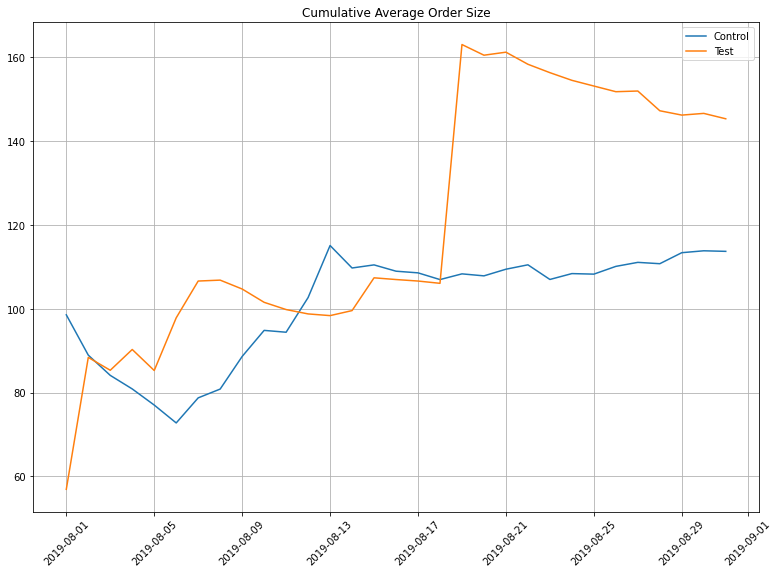

In [48]:
plt.figure(figsize=(13,9))
plt.plot(control_avg_order['date'], control_avg_order['cum_avg_order_size'], label='Control')
plt.plot(test_avg_order['date'], test_avg_order['cum_avg_order_size'], label='Test')
plt.title('Cumulative Average Order Size')
plt.xticks(rotation=45)
plt.grid()
plt.legend()
plt.show()

The cumulative average order size graph shows an overall increase in cumulative order size over time, but with many fluctuations and lack of stability through parts of the test period. Once again we can notice of this spike in the test group around the 19th, probably resulting from outliers - an extremely large order size.<br>
The control group starts the period with a significant decrease followed by a week of steep increase that turns into a mild increase close to stabilization across the second half. The test group cumulative average order size start with a steep rise and keep incresing for almost 3 weeks in a fluctuating manner, followed by moderate decrease. <br>
At this stage it is difficult to determine which group has a higher cumulative average order size, although the last days of the test indicate that the test group is on the lead. 

**3. Relative difference in cumulative average order size for group B compared with group A**<br>
To find the relative difference in cumulative average order size, we'll devide the cumulative average order size of the test group by the correspoding value of the control group:

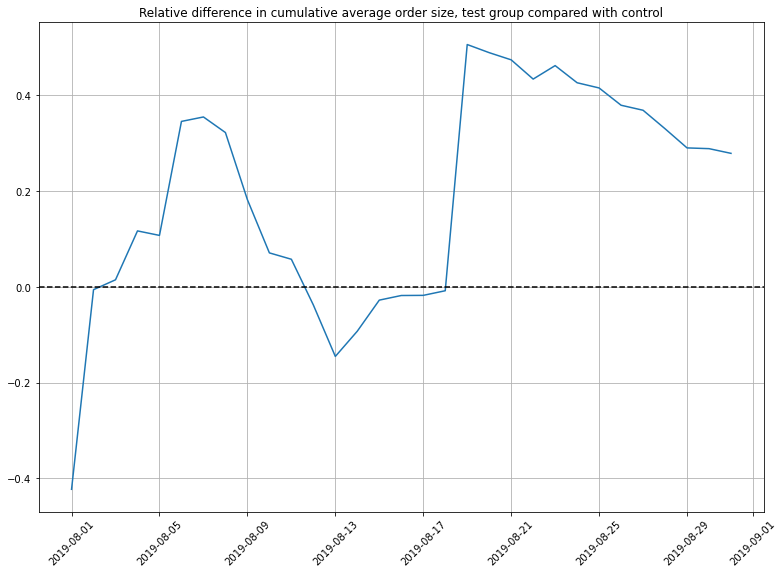

In [49]:
plt.figure(figsize=(13,9))
plt.plot(control_avg_order['date'], 
         (test_avg_order['cum_avg_order_size']) / (control_avg_order['cum_avg_order_size']) -1)
plt.axhline(y=0, color='black', linestyle='--')
plt.title('Relative difference in cumulative average order size, test group compared with control')
plt.xticks(rotation=45)
plt.grid()
plt.show()

The cumulative average order size of test group (B) starts far below the control group, but then a fast rising brings it to a spike around the end of first week, then diving deep down for another week, rising high suddenly and slowly decreasing towards the end of the period.<br>
The cumulative avergae order size ratio is not stable through big parts pf the test, starts showing stabilization in the last week. This behavior makes it too early to draw conclusions about test results, although generally seems to be higher for the test group in most of the A/B test period.

**4. Conversion rate as the ratio of orders to the number of visits for each day**<br>
To calculate conversion rate (orders / visits in our case) we need to split the visits data into control and test groups (A and B respectively), and merge the daily visits for each group to the corresponding split orders table:

In [50]:
visits.head()

,date,group,visits
0,2019-08-01,A,719
1,2019-08-02,A,619
2,2019-08-03,A,507
3,2019-08-04,A,717
4,2019-08-05,A,756


In [51]:
visits_control = visits[visits['group'] == 'A']
visits_test = visits[visits['group'] == 'B']

In [52]:
control_merged = pd.merge(control_avg_order, visits_control, on='date', how='left')
control_merged['conversion'] = control_merged['orders'] / control_merged['visits']
control_merged.head()

,date,revenue,orders,cum_rev,cum_orders,cum_avg_order_size,group,visits,conversion
0,2019-08-01,2266.6,23,2266.6,23,98.547826,A,719,0.031989
1,2019-08-02,1468.3,19,3734.9,42,88.926190,A,619,0.030695
2,2019-08-03,1815.2,24,5550.1,66,84.092424,A,507,0.047337
3,2019-08-04,675.5,11,6225.6,77,80.851948,A,717,0.015342
4,2019-08-05,1398.0,22,7623.6,99,77.006061,A,756,0.029101


In [53]:
test_merged = pd.merge(test_avg_order, visits_test, on='date', how='left')
test_merged['conversion'] = test_merged['orders'] / test_merged['visits']
test_merged.head()

,date,revenue,orders,cum_rev,cum_orders,cum_avg_order_size,group,visits,conversion
0,2019-08-01,967.2,17,967.2,17,56.894118,B,713,0.023843
1,2019-08-02,2568.1,23,3535.3,40,88.382500,B,581,0.039587
2,2019-08-03,1071.6,14,4606.9,54,85.312963,B,509,0.027505
3,2019-08-04,1531.6,14,6138.5,68,90.272059,B,770,0.018182
4,2019-08-05,1449.3,21,7587.8,89,85.256180,B,707,0.029703


Daily Conversion rate for each group plot:

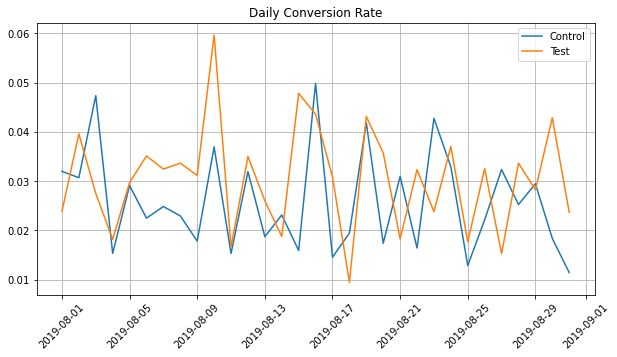

In [54]:
plt.figure(figsize=(10,5))
plt.plot(control_merged['date'], control_merged['conversion'], label='Control')
plt.plot(test_merged['date'], test_merged['conversion'], label='Test')
plt.title('Daily Conversion Rate')
plt.xticks(rotation=45)
plt.grid()
plt.legend()
plt.show()

Calculating overall conversion rate for each group:

In [55]:
print('Overall conversion of control group:', control_merged['orders'].sum()
      /control_merged['visits'].sum())

Overall conversion of control group: 0.02497865072587532


In [56]:
print('Overall conversion of test group:', test_merged['orders'].sum()
      /test_merged['visits'].sum())

Overall conversion of test group: 0.02897018397124128


The daily conversion rate chart demonstrates quite similar behavior for both groups, around the same conversion values (excpet one noticeable spike in the test group on 2018-08-10). This graphical result indicates that there's no considerable difference in conversion rates between groups, and that this KPI has a lot of changes in daily basis.<br>
The calculation of the overall conversion showed a slight difference between groups - 2.5% in control group and 2.9% in test group.

As it looks quite difficult to observe the difference between groups from the combined lines plot above, we'll plot a relative difference graph as well:

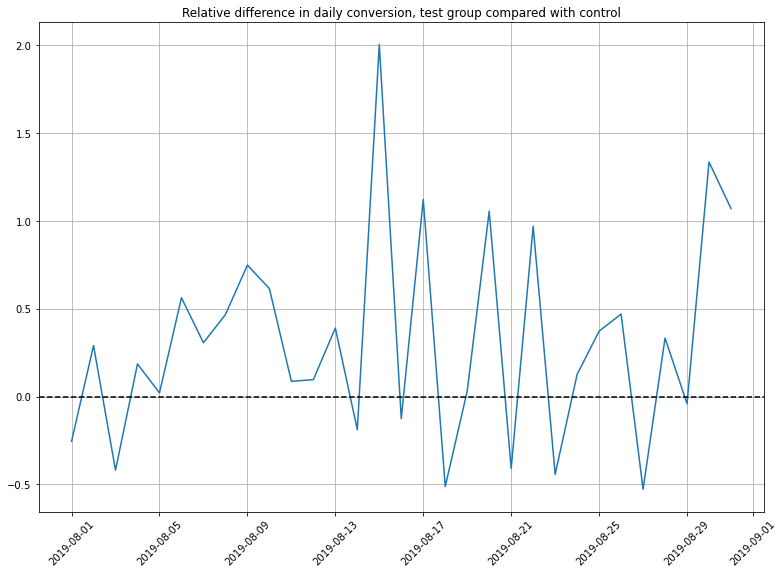

In [57]:
plt.figure(figsize=(13,9))
plt.plot(control_merged['date'], 
         (test_merged['conversion']) / (control_merged['conversion']) -1)
plt.axhline(y=0, color='black', linestyle='--')
plt.title('Relative difference in daily conversion, test group compared with control')
plt.xticks(rotation=45)
plt.grid()
plt.show()

The above graph of relative difference in conversion of test group compared to control, though fluctuating a lot through the whole test, shows that most of the time the test group has higer rates of conversion. 

**5. Scatter chart of the number of orders per user**<br>
To plot a scatter chart of the number of orders per user, we'll group the orders data by user (visitor), counting number of orders for each user, and visualizing throguh scatter chart:

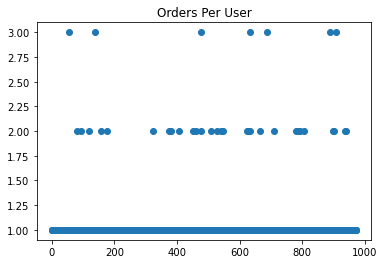

In [58]:
orders_per_user = orders_new.groupby('visitorId')['transactionId'].count().reset_index()
x_values = pd.Series(range(0, len(orders_per_user['visitorId'])))
plt.scatter(x_values, orders_per_user['transactionId'])
plt.title('Orders Per User')
plt.show()

The vast majority of the users palced 1 order, a much smaller amount with 2 orders, and several users ordered 3 times through the whole period. Hence we can conclude that the typical buyer in the online store place usually no more than 1 order during a time period of 1 month.

**6. The 95th and 99th percentiles for the number of orders per user, defining the point at which a data point becomes an anomaly.**

We'll pass the np.percentile method the number of orders grouped by user from the order per user dataset we created previously, and the array with the percentiles:

In [59]:
print('95th and 99th percentiles for the number of orders per user:', np.percentile(
      orders_per_user['transactionId'], [95, 99]), 'respectively')

95th and 99th percentiles for the number of orders per user: [1. 2.] respectively


Percentiles calculations determines that up to 95% of the users made 1 order, and no more than 1% ordered more than 2 times or more. <br>
Considering the scatter plot and the percentiles calculation, we will define the point at which the number of orders per user becomes an anomaly as above 2 orders.

**7. Scatter cahrt of order prices**

Order prices in our case are presented by revenue data. 
<br>Scatter chart of revenue from each order:

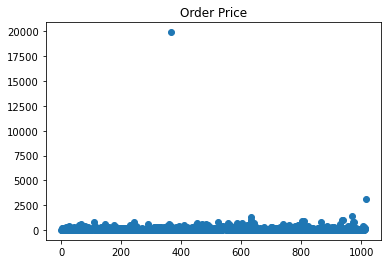

In [60]:
x_values = pd.Series(range(0, len(orders_new['revenue'])))
plt.scatter(x_values, orders_new['revenue'])
plt.title('Order Price')
plt.show()

The vast majotity of values in order prices are below 2500. There are two noticeable outliers in the scatter plot, one of which extremely disproportionate to the group, with a price of about 20000.

**8. The 95th and 99th percentiles of order prices, defining the point at which a data point becomes an anomaly**

In [61]:
np.percentile(orders_new['revenue'], [95, 99])

array([414.275, 830.3  ])

The percentiles calculaiton of order price, together with the scatter plot, indicate that almost all the order prices are below 830. <br>
The results might explain the spikes that were seen earlier in the cumulative revenue graph and the cumulative average order size graph. It seems that the user who placed that extreme order belongs to the test group, and might distort results and conclusions from the relevant parts of the A/B test. <br>
Based on these findings, and given the limited ability to distinguish between values in the range from 95 to 99 percentiles, we'll define the point at which an order price becomes an anomaly as equals to or greater than 830. 

**9. Statistical significance of the difference in conversion between the groups using the raw data**

In order to find the statistical significance of the difference in conversion rates, we'll use Z-test for proportions. Thus determining whether to reject the null hypothesis or not. <br>
For the Z-test we need to find number of trials and successes for each group. In our case trials will be the total number of visits, and successes the total number of orders, means conversion rate.<br>
Start with control group:

In [62]:
trials_control = control_merged['visits'].sum()
success_control = control_merged['orders'].sum()
print('Control group trials:', trials_control)
print('Control group successes:', success_control)

Control group trials: 18736
Control group successes: 468


Test group:

In [63]:
trials_test = test_merged['visits'].sum()
success_test = test_merged['orders'].sum()
print('Test group trials:', trials_test)
print('Test group successes:', success_test)

Test group trials: 18916
Test group successes: 548


We'll use the next function to execute the Z-test, according to the formula of Z-test for proportions:

In [64]:
def Z_test(successes1, trials1, successes2, trials2):
    """
    This function takes each group proportion and its components (trials and seccesses) and returns
    Z-value and P-value as the statistical significance in the difference between the proportions
    """
    
    p1 = successes1/trials1
    p2 = successes2/trials2
    p_combined = (successes1 + successes2) / (trials1 + trials2)
    difference = p1 - p2
    
    z_value = difference / math.sqrt(p_combined * (1 - p_combined) * (1/trials1 + 1/trials2))

    distr = st.norm(0, 1) 

    alpha = 0.05
    p_value = (1 - distr.cdf(abs(z_value))) * 2

    print('p-value: ', p_value)
    if p_value > alpha:
        print("We can't reject the null hypothesis")
    else:
        print('We reject the null hypothesis')


Before testing, we'll formulate the null hypothesis (H0) and alternative hypothesis (H1) for the test:

- H0: There is no difference in conversion rates between the groups, based on the raw data.<br>
- H1: The conversion rate of the test group differs from the conversion rate of the control group, based on the raw data.

In [65]:
Z_test(success_control, trials_control, success_test, trials_test)

p-value:  0.016851380434703023
We reject the null hypothesis


The P-value calculated from the Z-test for proportions shows that there is a statistically significant difference in conversion rates between the groups. That is, the A/B test resulted in higher conversion rates, encouraging (successfuly) more users in the test group to buy in comparison to the control group.

**10. Statistical significance of the difference in average order size between the groups using the raw data**

In order to find if there's a statistically significant difference between groups in avergae order size, we'll calculate avergae order size for each day in each group, take these sets as our samples. Checking the normality of the samples' distribution, using the Shapiro test, will help us to decide which test to conduct - T-test for normal distribution, or else Mann-Whitney U test. In case of normal distributions, we'll also check equality of samples variances using Levene's test. Then calcualating the P-value from the T-test / Mann-Whitney result.

Let's start with creating the smaples, using the grouped tables that were created earlier:

In [66]:
control_avg_order.head()

,date,revenue,orders,cum_rev,cum_orders,cum_avg_order_size
0,2019-08-01,2266.6,23,2266.6,23,98.547826
1,2019-08-02,1468.3,19,3734.9,42,88.926190
2,2019-08-03,1815.2,24,5550.1,66,84.092424
3,2019-08-04,675.5,11,6225.6,77,80.851948
4,2019-08-05,1398.0,22,7623.6,99,77.006061


In [67]:
control_avg_order['avg_order'] = control_avg_order['revenue'] / control_avg_order['orders']
test_avg_order['avg_order'] = test_avg_order['revenue'] / test_avg_order['orders']
control_avg_order.head()

,date,revenue,orders,cum_rev,cum_orders,cum_avg_order_size,avg_order
0,2019-08-01,2266.6,23,2266.6,23,98.547826,98.547826
1,2019-08-02,1468.3,19,3734.9,42,88.926190,77.278947
2,2019-08-03,1815.2,24,5550.1,66,84.092424,75.633333
3,2019-08-04,675.5,11,6225.6,77,80.851948,61.409091
4,2019-08-05,1398.0,22,7623.6,99,77.006061,63.545455


In [68]:
print('Control group average order:', control_avg_order['avg_order'].mean())
print('Test group average order:', test_avg_order['avg_order'].mean())

Control group average order: 115.51247176082741
Test group average order: 138.37116968351648


We can see that the average order size for the test group is higher, soon we'll find out whether this difference is statistically significant.

Checking normality of distributions using Shapiro-wilk test, testing the hypotheses:

- H0: The distribution of the average order size in normal based on the raw data (for the tested group)
- H1: The avergae order size in not normally distributed based on the raw data (for the tested group)

In [69]:
st.shapiro(control_avg_order['avg_order'])

ShapiroResult(statistic=0.9144196510314941, pvalue=0.01683112233877182)

In [70]:
st.shapiro(test_avg_order['avg_order'])

ShapiroResult(statistic=0.33859729766845703, pvalue=1.0023649965607007e-10)

For both samples we got P-value < 0.05, means that we reject the null hypothesis and can assume that the populations are not distributed normally in average order size.<br>
So we should use Mann-Whitney U test, testing the hypotheses:

- H0: There is no difference in average order size between the groups, based on the raw data.<br>
- H1: The average order size of the test group differs from the average order size of the control group, based on the raw data.

In [71]:
stats, p_value = st.mannwhitneyu(control_avg_order['avg_order'], test_avg_order['avg_order'])
print('P-value:', p_value)
if p_value > 0.05:
   print("We can't reject the null hypothesis")
else:
    print('We reject the null hypothesis')

P-value: 0.9550914317372012
We can't reject the null hypothesis


The results of Mann-Whitney U test indicate that we can't consider the difference in average order size between the groups as statistically significant. Namely, by the end of the current test period there was no significant improvement in avergae order size.

**11. Statistical significance of the difference in conversion between the groups using the filtered data**

As we found previously, the raw data contains anomalies in the order price and orders per user that might affect the results of our analysis. <br>
We'll create flitered datasets according to the decisions that were taken in the anomalies part, filtering by orders per user < 3, and order size < 830.<br>
To filter by number of orders, we'll use the orders_per_user dataset we created earlier, and extract the visitorId's whose transcationId's are above 2. Then merge it on 'visitorId' with the orders table filtered by order size (revenue), devide the new data to A/B groups, and calculate the metrics again.

In [72]:
orders_per_user = orders_per_user.sort_values(by='transactionId', ascending=False)
orders_per_user.columns = ['visitorId','orders']

In [73]:
extreme_orders = orders_per_user[orders_per_user['orders'] > 2]
extreme_orders.head()

,visitorId,orders
908,3967698036,3
55,249864742,3
478,2108163459,3
687,2988190573,3
890,3908431265,3


In [74]:
control_filtered = control_new[(
    control_new['revenue'] < 830) & (~control_new['visitorId'].isin(extreme_orders['visitorId']))] 
control_filtered['revenue'].describe()

count    446.000000
mean      99.634529
std      129.035511
min        5.000000
25%       20.300000
50%       50.100000
75%      125.550000
max      815.800000
Name: revenue, dtype: float64

In [75]:
control_filtered.head()

,transactionId,visitorId,date,revenue,group
7,2626614568,78758296,2019-08-15,20.1,A
8,1576988021,295230930,2019-08-15,215.9,A
10,3649131742,879864040,2019-08-15,65.7,A
12,2809384911,3213223594,2019-08-15,115.4,A
14,3859315276,1565034404,2019-08-15,170.9,A


The same filtering for test group:

In [76]:
test_filtered = test_new[(
    test_new['revenue'] < 830) & (~test_new['visitorId'].isin(extreme_orders['visitorId']))] 
test_filtered['revenue'].describe()

count    537.000000
mean      98.253445
std      127.543944
min        5.100000
25%       20.800000
50%       45.600000
75%      115.400000
max      815.800000
Name: revenue, dtype: float64

In [77]:
test_filtered.head()

,transactionId,visitorId,date,revenue,group
0,3667963787,3312258926,2019-08-15,30.4,B
1,2804400009,3642806036,2019-08-15,15.2,B
3,3797467345,1196621759,2019-08-15,155.1,B
4,2282983706,2322279887,2019-08-15,40.5,B
5,182168103,935554773,2019-08-15,35.0,B


Calculating conversion and average order size for the filtered data fo each group:

In [78]:
control_filtered = control_filtered.groupby('date').agg(
    {'revenue':'sum', 'transactionId':'nunique'}).reset_index()
control_filtered.columns = ['date','revenue','orders']
control_filtered.head()

,date,revenue,orders
0,2019-08-01,1779.3,18
1,2019-08-02,1438.3,18
2,2019-08-03,1815.2,24
3,2019-08-04,675.5,11
4,2019-08-05,1398.0,22


After we grouped by date and aggregated order size and number of orders, we'll merge with the correspoding visits data for conversion:

In [79]:
control_filtered_final = pd.merge(control_filtered, visits_control, how='left', on='date')
control_filtered_final['conversion'] = control_filtered_final['orders'] / control_filtered_final['visits']
control_filtered_final['avg_order_size'] = control_filtered_final['revenue'] / control_filtered_final['orders']
control_filtered_final.head()

,date,revenue,orders,group,visits,conversion,avg_order_size
0,2019-08-01,1779.3,18,A,719,0.025035,98.850000
1,2019-08-02,1438.3,18,A,619,0.029079,79.905556
2,2019-08-03,1815.2,24,A,507,0.047337,75.633333
3,2019-08-04,675.5,11,A,717,0.015342,61.409091
4,2019-08-05,1398.0,22,A,756,0.029101,63.545455


Same grouping and calculations for the test group:

In [80]:
test_filtered = test_filtered.groupby('date').agg(
    {'revenue':'sum', 'transactionId':'nunique'}).reset_index()
test_filtered.columns = ['date','revenue','orders']

test_filtered_final = pd.merge(test_filtered, visits_test, how='left', on='date')
test_filtered_final['conversion'] = test_filtered_final['orders'] / test_filtered_final['visits']
test_filtered_final['avg_order_size'] = test_filtered_final['revenue'] / test_filtered_final['orders']
test_filtered_final.head()

,date,revenue,orders,group,visits,conversion,avg_order_size
0,2019-08-01,967.2,17,B,713,0.023843,56.894118
1,2019-08-02,2568.1,23,B,581,0.039587,111.656522
2,2019-08-03,1071.6,14,B,509,0.027505,76.542857
3,2019-08-04,1531.6,14,B,770,0.018182,109.400000
4,2019-08-05,1449.3,21,B,707,0.029703,69.014286


Now we can find trials and successes for the filtered data and pass it to the Z-test function:

In [81]:
trials_control_filtered = control_filtered_final['visits'].sum()
success_control_filtered = control_filtered_final['orders'].sum()
print('Control group trials:', trials_control_filtered)
print('Control group successes:', success_control_filtered)

Control group trials: 18736
Control group successes: 446


In [82]:
trials_test_filtered = test_filtered_final['visits'].sum()
success_test_filtered = test_filtered_final['orders'].sum()
print('Test group trials:', trials_test_filtered)
print('Test group successes:', success_test_filtered)

Test group trials: 18916
Test group successes: 537


Calling the Z-test function for statistical significance of difference in conversion rates and testing the hypotheses using the filtered data:

- H0: There is no difference in conversion rates between the groups, based on the filtered data.<br>
- H1: The conversion rate of the test group differs from the conversion rate of the control group, based on the filtered data.

In [83]:
Z_test(success_control_filtered, trials_control_filtered, success_test_filtered, trials_test_filtered)

p-value:  0.005283098862493896
We reject the null hypothesis


The p_value from the Z-test above shows that for the filtered data, as well as the raw data, the difference in comversion between groups is statistically significant. After filtering the data the P-value from Z-test became even smaller (0.017 for raw data, 0.005 for filtered data), suggesting a larger difference between groups than before.

**12. Statistical significance of the difference in average order size between the groups using the filtered data**<br>
As done before, we'll check normality of distrubtions using Shapiro-Wilk test. Thus decide which test we should use, pass our samples of average order size from the filtered data, testing the hypotheses: 

- H0: The distribution of the average order size in normal based on the filtered data (for the tested group)
- H1: The avergae order size in not normally distributed based on the filtered data (for the tested group)

In [84]:
st.shapiro(control_filtered_final['avg_order_size'])

ShapiroResult(statistic=0.9310331344604492, pvalue=0.046779606491327286)

In [85]:
st.shapiro(test_filtered_final['avg_order_size'])

ShapiroResult(statistic=0.9512355327606201, pvalue=0.16884596645832062)

Unlike in the raw data, the test group distribution of average order size in the filtered data can be considered as normal. But the control group in this case doesn't pass the statistical threshold of 0.05. By the P-values from the Shapiro-Wilk test (0.05 for control group and 0.17 for test group) we reject the null hypothesis of normality for the control group, but we can't reject the null hypothesis of normality for the test group.<br>
In such case we'll use the Mann-Whitney U test for difference between groups, testing the hypotheses using the filtered data:

- H0: There is no difference in average order size between the groups, based on the filtered data.<br>
- H1: The average order size of the test group differs from the average order size of the control group, based on the filtered data.

In [86]:
stats, p_value = st.mannwhitneyu(
    control_filtered_final['avg_order_size'], test_filtered_final['avg_order_size'])
print('P-value:', p_value)
if p_value > 0.05:
    print("We can't reject the null hypothesis")
else:
    print('We reject the null hypothesis')

P-value: 0.7460840109196356
We can't reject the null hypothesis


The P-value from the above Mann-Whitney U test (0.75) indicates that we can't reject the null hypothesis, namely the difference in average order size is not statistically significant between the groups based on the filtered data. The meaning for our testing is that the A/B test failed to bring to significant improvement in the average order size.

Let's take a look at the order price scatter plot based on the filtered data:

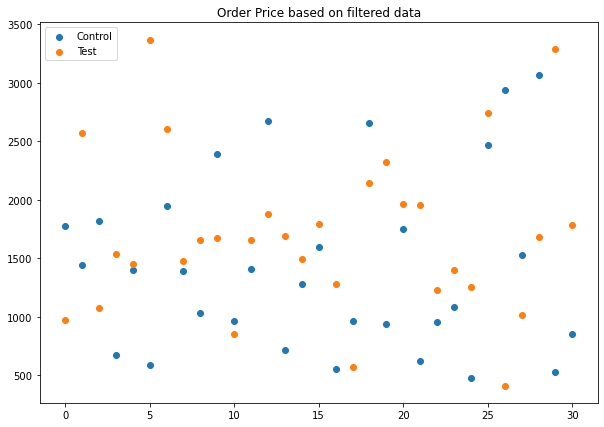

In [87]:
plt.figure(figsize=(10,7))
x_values_control = pd.Series(range(0, len(control_filtered['revenue'])))
x_values_test = pd.Series(range(0, len(test_filtered['revenue'])))
plt.scatter(x_values_control, control_filtered['revenue'], label='Control')
plt.scatter(x_values_test, test_filtered['revenue'], label='Test')
plt.title('Order Price based on filtered data')
plt.legend()
plt.show()

**13. Decision based on the test results**

The A/B test analysis investigated several metrics, using raw data and filtered data, in order to decide which actions should be taken next. <br>
Here are our main findings from the analysis:
- Cumulative revenue was higher in the test group, particularly in the second half of the period.
- In Cumulative average order size it was hard to make a definite conclusion due to many fluctuations in the graph, but in general is higher for the test group.
- Daily conversion rate was higher for the test group, with quite similar behavior through the test between the groups.
- The difference in conversion between groups was statistically significant, implies higher conversion in the test group, either in the raw data and in the filtered data.
- The difference in average order size between groups was not statistically significant, either in the raw data and in the filtered data.

Based on these findings and the analysis process, I would suggest to stop the test and consider the Test group the leader.<br>
Although we observed an unstable behavior of two KPI's - cumulative revenue and cumulative average order size - in the first 3 weeks of the test, it starts stabilizing during the last days. The resources consuming continuation of such test, given the fact the we might not get any change in results, is probably neither efficient nor worthwhile. <br>
Moreover, the significant improvement in conversion means that our goal was partly achieved already, and stands at the core of this decision.<br>

However, as part of the critical approach, we should mention the main limitation of our research: <br>
The visits table was already aggregated in this project, means we couldn't make the desired changes in this dataset as in the orders data. Consequently, we couldn't extract from the visits data visitors that were extracted from the orders table through filtering. This fact might affect the test results, and should be taken into account.